### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. It transforms high-dimensional data into a lower-dimensional space while retaining as much variance (information) as possible.

#### Key Concepts:
1. **Dimensionality Reduction**: PCA reduces the number of features (dimensions) in a dataset while preserving the most important information.
2. **Principal Components**: These are new, uncorrelated variables that are linear combinations of the original features. They are ordered by the amount of variance they capture:
    - The first principal component captures the maximum variance.
    - The second principal component captures the next highest variance, orthogonal to the first, and so on.
3. **Variance**: PCA focuses on retaining the features with the highest variance, as they are assumed to carry the most information.

#### Steps in PCA:
1. **Standardize the Data**: Scale the data so that each feature has a mean of 0 and a standard deviation of 1.
2. **Compute the Covariance Matrix**: This matrix represents the relationships between features.
3. **Calculate Eigenvalues and Eigenvectors**:
    - Eigenvalues represent the amount of variance captured by each principal component.
    - Eigenvectors define the direction of the principal components.
4. **Select Principal Components**: Choose the top `k` components that capture the most variance.
5. **Transform the Data**: Project the original data onto the selected principal components.

#### Applications:
- **Data Visualization**: Reduce data to 2D or 3D for easier visualization.
- **Noise Reduction**: Remove less significant components to reduce noise.
- **Feature Extraction**: Identify the most important features in the data.

#### Example in Python:
```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data
data = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0]])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

print("Principal Components:")
print(principal_components)
```

PCA is a powerful tool but assumes linear relationships and may not work well with highly non-linear data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

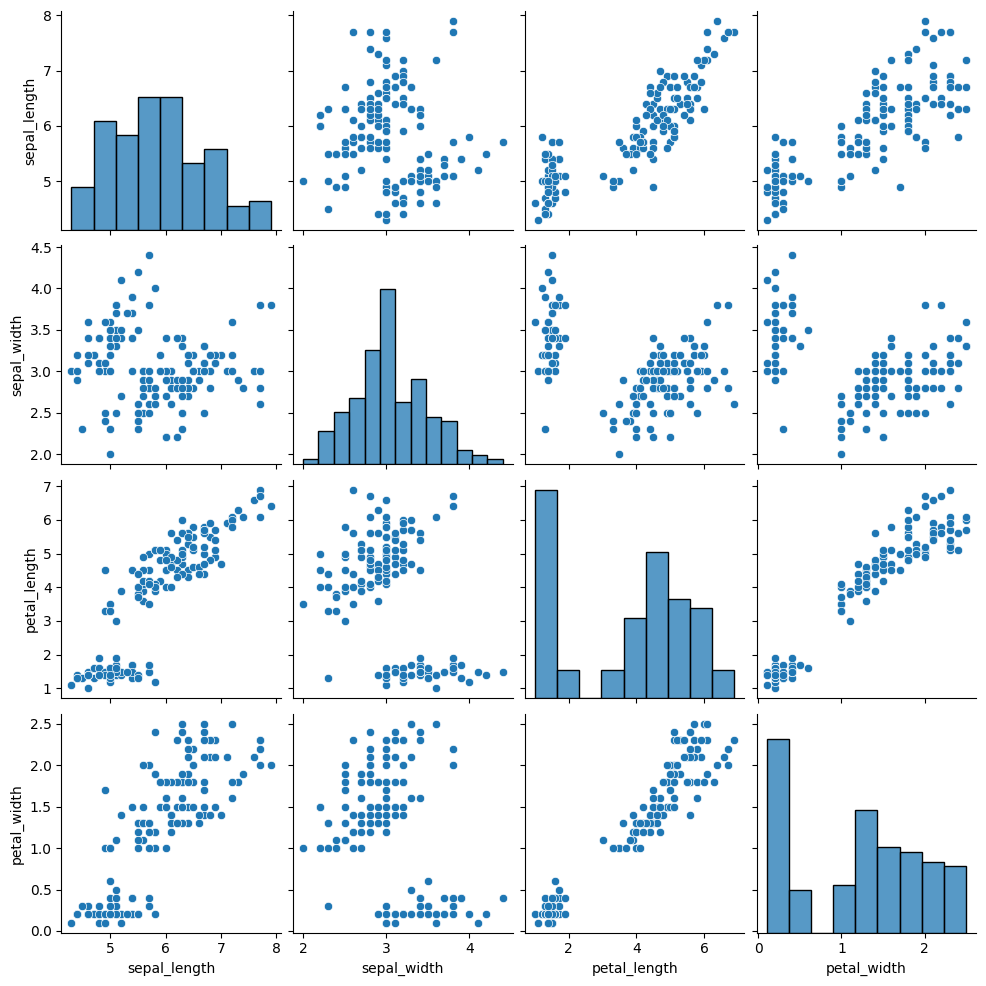

In [3]:
sns.pairplot(iris)

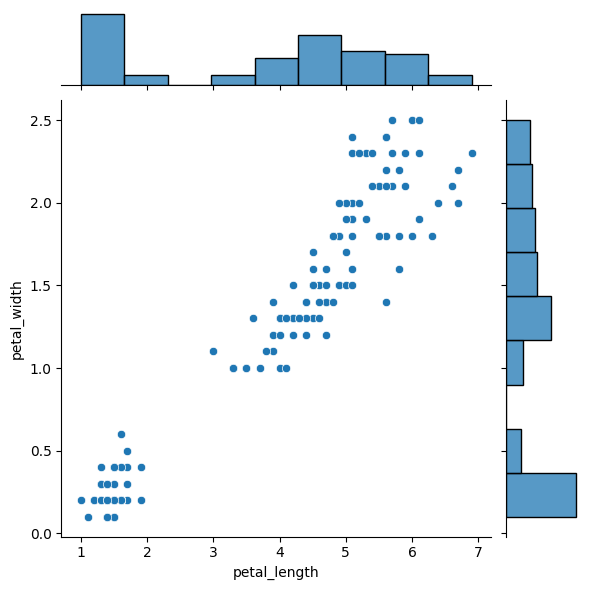

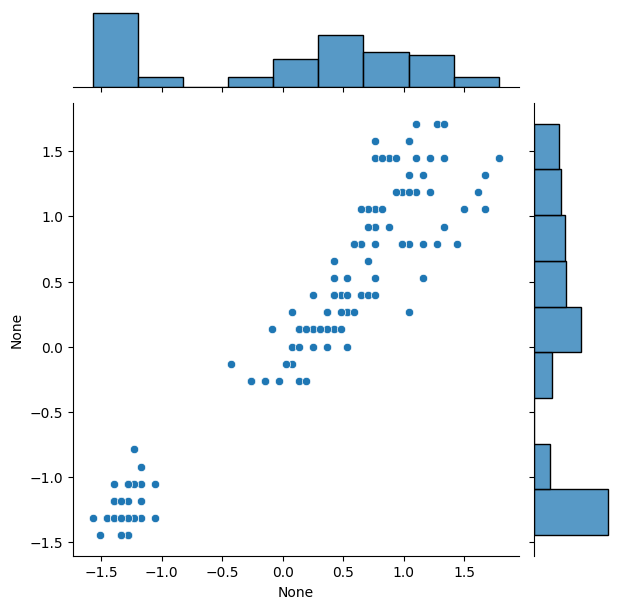

In [4]:
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:, 3])

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [7]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [8]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [9]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i / sum(eigen_values))*100)

print(variance_explained)

[np.float64(72.9624454132999), np.float64(22.850761786701725), np.float64(3.6689218892828612), np.float64(0.5178709107154993)]


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)


PCA(n_components=2)

In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [12]:
reduce_scaled = pca.transform(scaled)

In [13]:
reduce_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

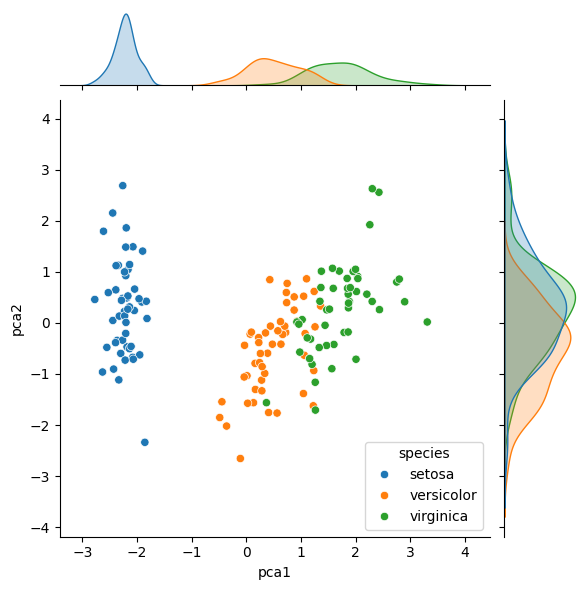

In [18]:
iris['pca1'] = reduce_scaled[:, 0]
iris['pca2'] = reduce_scaled[:, 1]
iris
sns.jointplot(data=iris, x='pca1', y='pca2', hue='species')